# Heart Health Prediction

#### Importing Data form heart.csv

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
import joblib
import shap
df=pd.read_csv("C:/Users/anush/Downloads/heart.csv")
df.head() 

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0


# Data Cleansing 

#### Listing Null Values form data

In [80]:
print(df.isnull().sum())

Age                       0
Sex                       0
RestBP                    0
Chol                      0
Fbs                       0
MaxHR                     0
ExAng                     0
Oldpeak                   0
Ca                        0
Target                    0
0                         0
Typical                   0
Asymptomatic              0
Nonanginal                0
Normal_restECG            0
Wave_abnormal_restECG     0
Ventricular_ht_restECG    0
Slope_upsloping           0
Slope_flat                0
Slope_downsloping         0
0                         0
1                         0
2                         0
dtype: int64


###### Droping Null values because Null values are very less as compared to data size

In [81]:
df=df.dropna()

# Data Visualization 

##### Give the info of Data Type

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        301 non-null    int64  
 1   Sex        301 non-null    int64  
 2   ChestPain  301 non-null    object 
 3   RestBP     301 non-null    int64  
 4   Chol       301 non-null    int64  
 5   Fbs        301 non-null    int64  
 6   RestECG    301 non-null    int64  
 7   MaxHR      301 non-null    int64  
 8   ExAng      301 non-null    int64  
 9   Oldpeak    301 non-null    float64
 10  Slope      301 non-null    int64  
 11  Ca         301 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     301 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 35.3+ KB


###### Describing the whole Data

In [47]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.00000,301.000000
mean,54.451827,0.681063,131.714286,246.936877,0.146179,0.990033,149.700997,0.325581,1.043189,1.601329,0.69103,0.458472
std,9.067258,0.466841,17.655729,51.859869,0.353874,0.994937,22.860817,0.469372,1.163384,0.616872,0.94915,0.499102
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.00000,0.000000
50%,56.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.00000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.00000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.00000,1.000000


In [82]:
!pip install -U ydata-profiling

##### Pandas Profiling Provide the Report of data set including Corelation

In [85]:
from ydata_profiling import ProfileReport
print(ProfileReport)

<class 'ydata_profiling.profile_report.ProfileReport'>


In [96]:
print(df.columns)

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'MaxHR', 'ExAng', 'Oldpeak',
       'Ca', 'Target', 'Typical', 'Asymptomatic', 'Nonanginal',
       'Normal_restECG', 'Wave_abnormal_restECG', 'Ventricular_ht_restECG',
       'Slope_upsloping', 'Slope_flat', 'Slope_downsloping', '2'],
      dtype='object')


In [97]:
df = df.drop(columns=['2'])

In [104]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████| 19/19 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [127]:
d=df['Target'].value_counts()
print(d)

Target
0    164
1    139
Name: count, dtype: int64


##### Heart Diseases Ratio in Dataset
###### Blue Graph indicate no heart desease and Orange Graph show Heart desease

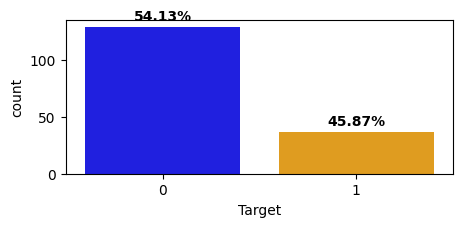

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotTarget():
    plt.figure(figsize=(5, 2)) 
    ax = sns.countplot(x='Target', data=df, palette=['blue', 'orange']) 
    target_counts = df['Target'].value_counts().sort_index()  

    for i, p in enumerate(ax.patches):
        count = target_counts.iloc[i]  
        x = p.get_x() + p.get_width() / 2.0  
        y = p.get_height() + (0.02 * df.shape[0])  
        label = f'{(count / df.shape[0]) * 100:.2f}%'  
        ax.text(x, y, label, ha='center', fontsize=10, fontweight='bold', color='black')  

plotTarget()
plt.show()

##### Checking the corelation of data

In [116]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca             int64
Thal          object
Target         int64
dtype: object

In [134]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['ChestPain'] = encoder.fit_transform(df['ChestPain'])
df['Thal'] = encoder.fit_transform(df['Thal'])


In [135]:
df.corr()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
Age,1.000000,-0.097542,-0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.332340,0.056234,0.223120
Sex,-0.097542,1.000000,-0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.101598,0.201136,0.276816
ChestPain,-0.104139,-0.010084,1.000000,0.036077,-0.072319,0.039975,-0.067505,0.334422,-0.384060,-0.202277,-0.152050,-0.236731,-0.188498,-0.414446
RestBP,0.284946,-0.064456,0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.101357,0.052215,0.150825
Chol,0.208950,-0.199915,-0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.109179,0.065518,0.085164
Fbs,0.118530,0.047862,0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.158021,0.010928,0.025264
RestECG,0.148868,0.021647,-0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.126633,-0.011021,0.169202
MaxHR,-0.393806,-0.048663,0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.251931,-0.125285,-0.417167
ExAng,0.091661,0.146201,-0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.149046,0.228038,0.431894
Oldpeak,0.203805,0.102173,-0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.275849,0.194685,0.424510


##### Select Age as most dependent data on label 
###### Disease Probability Bar Plot

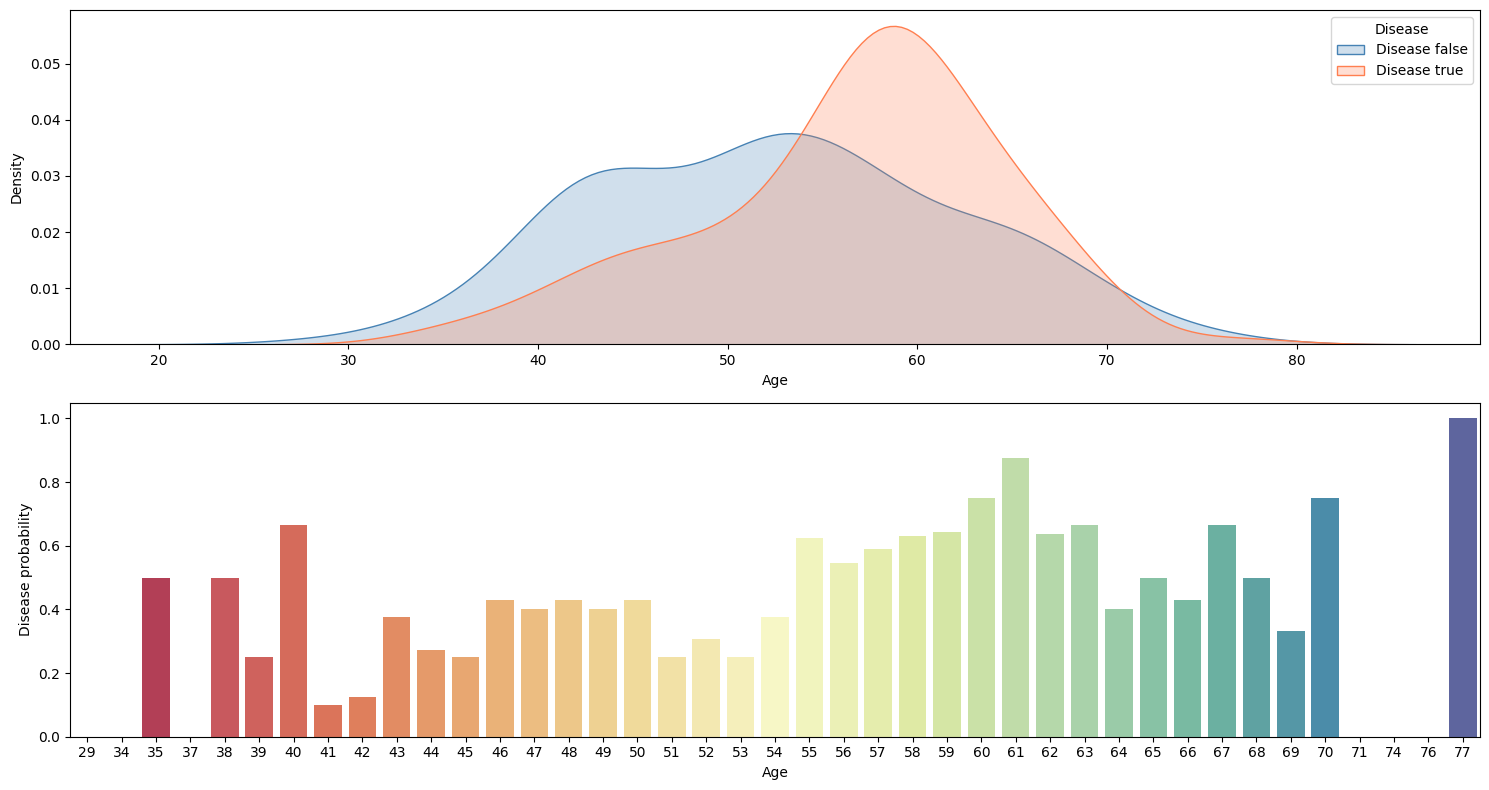

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

sns.kdeplot(
    data=df[df['Target'] == 0], x="Age", fill=True, ax=axes[0], label='Disease false', color='steelblue'
)
sns.kdeplot(
    data=df[df['Target'] == 1], x="Age", fill=True, ax=axes[0], label='Disease true', color='coral'
)

axes[0].set(xlabel='Age', ylabel='Density')
axes[0].legend(title='Disease')

avg = df[["Age", "Target"]].groupby(['Age'], as_index=False).mean()

palette = sns.color_palette("Spectral", len(avg))  # Can also try "husl", "viridis", etc.
sns.barplot(x='Age', y='Target', data=avg, ax=axes[1], palette=palette)

axes[1].set(xlabel='Age', ylabel='Disease probability')

plt.tight_layout()
plt.show()

###### Checking For Categorical Data

In [161]:
chest_pain_types = ['Typical', 'Asymptomatic', 'Nonanginal']
df['ChestPain'] = df[chest_pain_types].idxmax(axis=1)
print(df['ChestPain'].value_counts())

ChestPain
Typical         230
Asymptomatic     50
Nonanginal       23
Name: count, dtype: int64


In [166]:
df['Thal'] = df['Thal_Normal'].apply(lambda x: 'Normal' if x == 1 else 'Other')
print(df['Thal'].value_counts())

Thal
Other     301
Normal      2
Name: count, dtype: int64


##### Ploting Function For Categorical Data " Chest Pain" && "Thalassemia"
##### Ploting Function For Continoius Data

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Define your lists based on your actual df.columns
category = [
    ('ChestPain', ['typical', 'nontypical', 'nonanginal', 'asymptomatic']),
    ('Thal', ['fixed', 'normal', 'reversable'])
]

continuous = [
    ('Age', 'Age in year'),
    ('Sex', '1 for Male 0 for Female'),
    ('RestBP', 'BP in Rest State'),
    ('Chol', 'serum cholestoral in mg/d'),
    ('Fbs', 'Fasting blood glucose'),
    ('MaxHR', 'Max Heart Rate'),
    ('ExAng', 'Exercise Induced Angina'),
    ('Oldpeak', 'ST depression by exercise relative to rest'),
    ('Ca', '# major vessels (0-3) colored by flourosopy')
]

# ✅ Plot functions
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='Target', hue=attribute, data=df, ax=axes[ax_index][1])
    
    avg = df[[attribute, 'Target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='Target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    legend1 = axes[ax_index][1].get_legend()
    legend2 = axes[ax_index][2].get_legend()
    
    if legend1:
        for t, l in zip(legend1.texts, labels):
            t.set_text(l)
    if legend2:
        for t, l in zip(legend2.texts, labels):
            t.set_text(l)

def plotContinuous(attribute, xlabel, ax_index):
    sns.histplot(df[attribute], ax=axes[ax_index][0], kde=True)
    axes[ax_index][0].set(xlabel=xlabel, ylabel='Density')
    sns.violinplot(x='Target', y=attribute, data=df, ax=axes[ax_index][1])

def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(category)]
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]


##### Categorical Plot

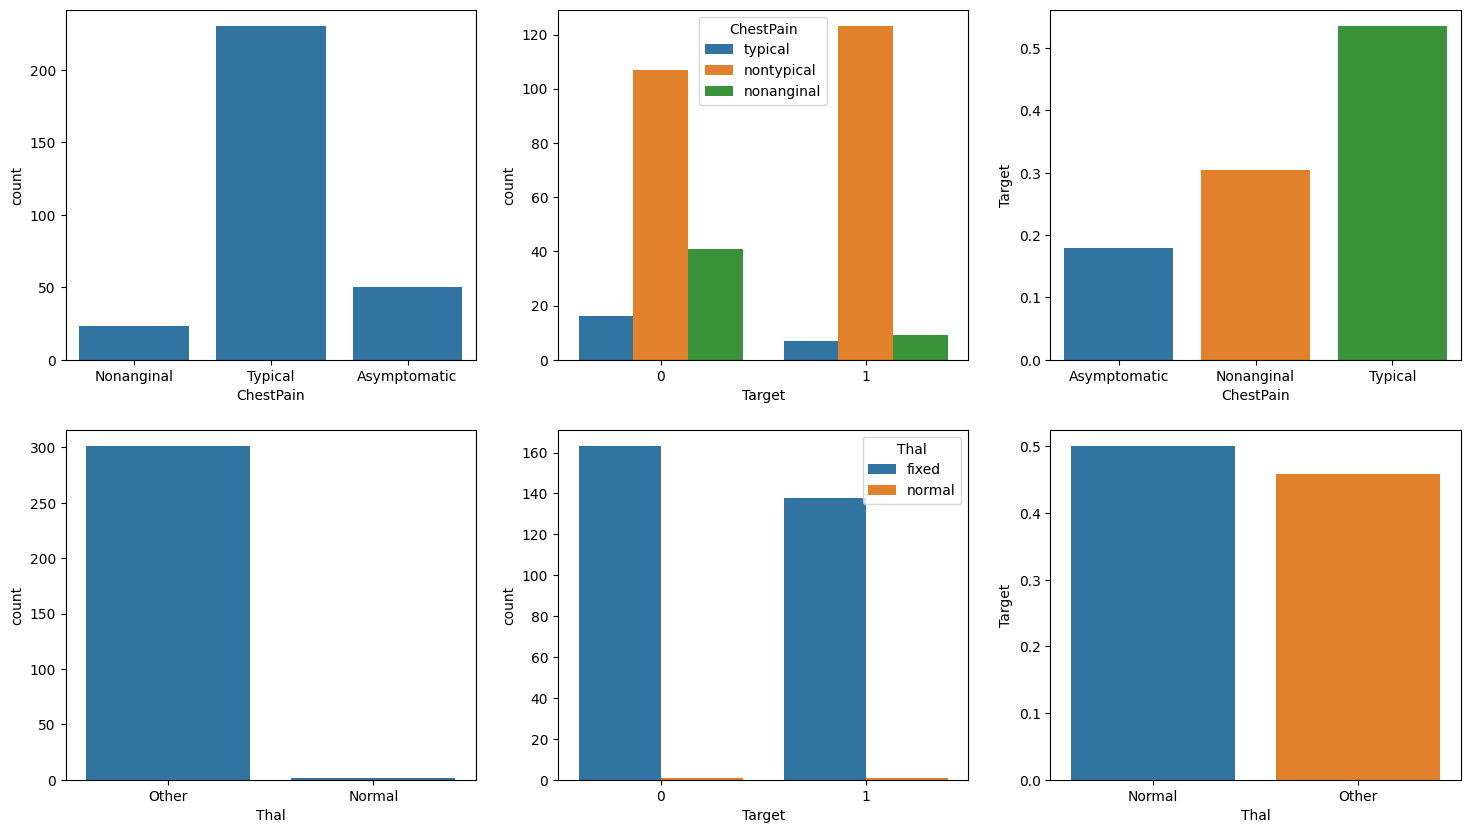

In [174]:
fig_categorial, axes = plt.subplots(nrows=len(category), ncols=3, figsize=(18, 5 * len(category)))
plotGrid(isCategorial=True)

##### Continuous Plot

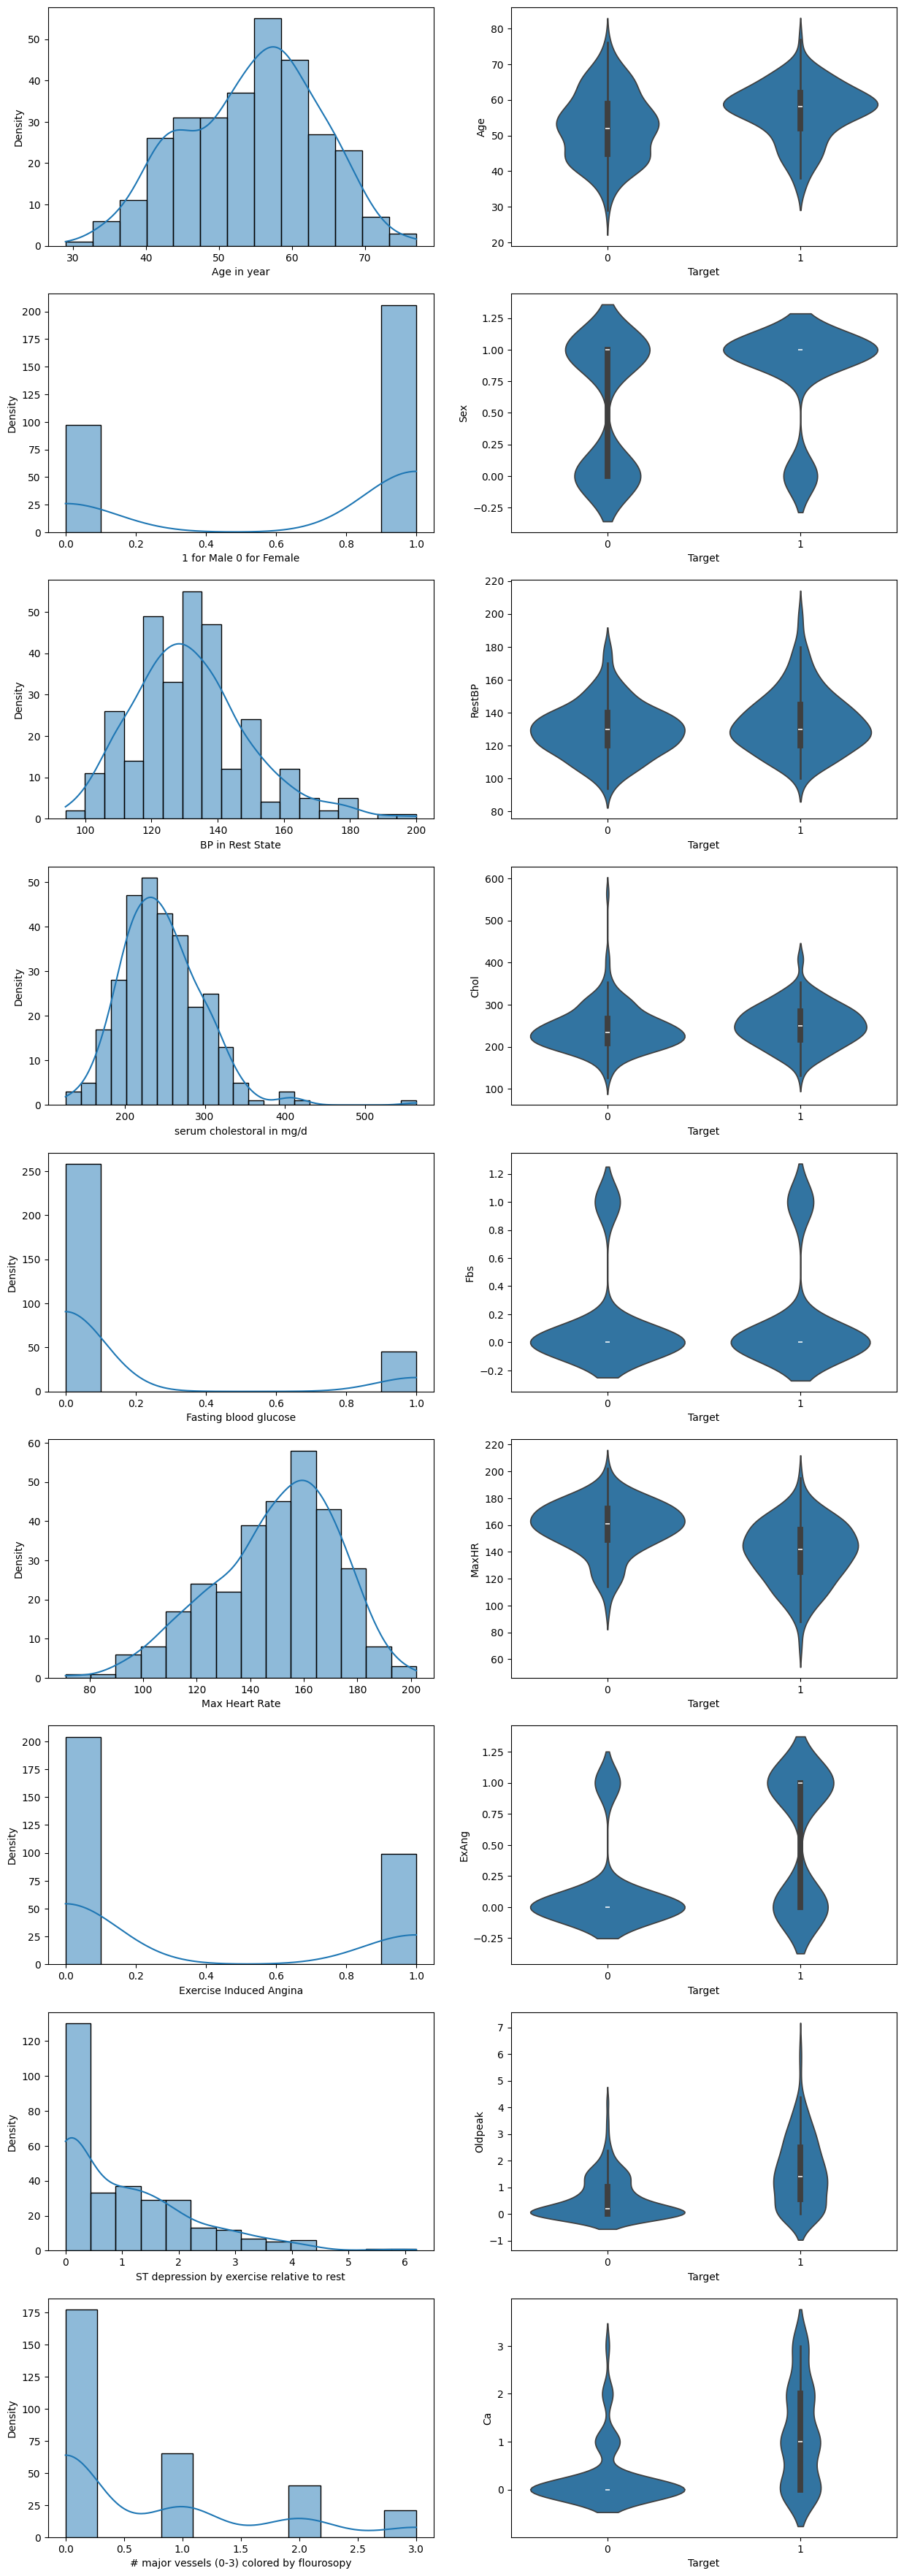

In [175]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 5 * len(continuous)))
plotGrid(isCategorial=False)

In [179]:
# ✅ Save the plots
fig_categorial.savefig("categorial_plots.png", bbox_inches='tight')
fig_continuous.savefig("continuous_plots.png", bbox_inches='tight')

# ✅ Create HTML report
html = """
<html>
<head>
    <title>Heart Health Data EDA Report</title>
</head>
<body style="font-family: Arial; text-align: center;">
    <h1 style="color:#2c3e50;">Heart Health Data - EDA Report</h1>

    <h2 style="color:#34495e;">Categorical Variables</h2>
    <img src="categorial_plots.png" width="95%" /><br><br>

    <h2 style="color:#34495e;">Continuous Variables</h2>
    <img src="continuous_plots.png" width="95%" />
</body>
</html>
"""

# ✅ Save HTML file
with open("EDA_Report.html", "w", encoding='utf-8') as file:
    file.write(html)

print("✅ HTML report saved as EDA_Report.html")

# ✅ Try to open in browser (if you're not in JupyterLab)
import os
import webbrowser

file_path = os.path.abspath("EDA_Report.html")
webbrowser.open("file://" + file_path)


✅ HTML report saved as EDA_Report.html


True

##### Creating Dummy

In [144]:
#dummy for chest Pain
chestpain_dummy = pd.get_dummies(df.loc[:,'ChestPain'])
chestpain_dummy.rename(columns={1: 'Typical', 2: 'Asymptomatic',3: 'Nonanginal', 4: 'Nontypical'}, inplace=True)
#dummy for RestECG
restecg_dummy = pd.get_dummies(df.loc[:,'RestECG'])
restecg_dummy.rename(columns={0: 'Normal_restECG', 1: 'Wave_abnormal_restECG',2:'Ventricular_ht_restECG'},inplace=True)
#dummy for Slope
slope_dummy = pd.get_dummies(df['Slope'])
slope_dummy.rename(columns={1: 'Slope_upsloping', 2:'Slope_flat',3: 'Slope_downsloping'},inplace=True)
#dummy for Thal
thal_dummy = pd.get_dummies(df['Thal'])
thal_dummy.rename(columns={3: 'Thal_Normal', 6: 'Thal_fixed',7: 'Thal_reversible'}, inplace=True)
#concatination in data frame
df = pd.concat([df,chestpain_dummy, restecg_dummy, slope_dummy, thal_dummy], axis=1)
#droping Column because their dummies are created
df.drop(['ChestPain','RestECG', 'Slope', 'Thal'], axis=1, inplace=True)

##### Checking the No object will left 

In [150]:
df.columns

Index([                   'Age',                    'Sex',
                       'RestBP',                   'Chol',
                          'Fbs',                  'MaxHR',
                        'ExAng',                'Oldpeak',
                           'Ca',                 'Target',
                              0,                'Typical',
                 'Asymptomatic',             'Nonanginal',
               'Normal_restECG',  'Wave_abnormal_restECG',
       'Ventricular_ht_restECG',        'Slope_upsloping',
                   'Slope_flat',      'Slope_downsloping',
                              0,                        1,
                              2,            'Thal_Normal'],
      dtype='object')

In [151]:
# Drop the unnamed (duplicate) dummy columns for Thal
df.drop(columns=[0, 1, 2], inplace=True)

In [152]:
print(df.columns)

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'MaxHR', 'ExAng', 'Oldpeak',
       'Ca', 'Target', 'Typical', 'Asymptomatic', 'Nonanginal',
       'Normal_restECG', 'Wave_abnormal_restECG', 'Ventricular_ht_restECG',
       'Slope_upsloping', 'Slope_flat', 'Slope_downsloping', 'Thal_Normal'],
      dtype='object')


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     303 non-null    int64  
 1   Sex                     303 non-null    int64  
 2   RestBP                  303 non-null    int64  
 3   Chol                    303 non-null    int64  
 4   Fbs                     303 non-null    int64  
 5   MaxHR                   303 non-null    int64  
 6   ExAng                   303 non-null    int64  
 7   Oldpeak                 303 non-null    float64
 8   Ca                      303 non-null    int64  
 9   Target                  303 non-null    int64  
 10  Typical                 303 non-null    bool   
 11  Asymptomatic            303 non-null    bool   
 12  Nonanginal              303 non-null    bool   
 13  Normal_restECG          303 non-null    bool   
 14  Wave_abnormal_restECG   303 non-null    bo

##### Checking dataset

In [180]:
df.head()

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Ca,Target,...,Nonanginal,Normal_restECG,Wave_abnormal_restECG,Ventricular_ht_restECG,Slope_upsloping,Slope_flat,Slope_downsloping,Thal_Normal,ChestPain,Thal
0,63,1,145,233,1,150,0,2.3,0,0,...,True,False,False,True,False,False,True,False,Nonanginal,Other
1,67,1,160,286,0,108,1,1.5,3,1,...,False,False,False,True,False,True,False,False,Typical,Other
2,67,1,120,229,0,129,1,2.6,2,1,...,False,False,False,True,False,True,False,False,Typical,Other
3,37,1,130,250,0,187,0,3.5,0,0,...,False,True,False,False,False,False,True,False,Typical,Other
4,41,0,130,204,0,172,0,1.4,0,0,...,False,False,False,True,True,False,False,False,Asymptomatic,Other


##### Selecting label means selected Column to predict in df_X and input column in df_y

In [66]:
df_X= df.loc[:, df.columns != 'Target']
df_y= df.loc[:, df.columns == 'Target']

# Model Training 

#### Recursive Feature Elimination

In [181]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

df_selected_X = df[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'MaxHR', 'ExAng', 'Oldpeak', 'Ca', 
                    'Typical', 'Asymptomatic', 'Nonanginal',  # ChestPain categories
                    'Normal_restECG', 'Wave_abnormal_restECG', 'Ventricular_ht_restECG',  # RestECG categories
                    'Slope_upsloping', 'Slope_flat', 'Slope_downsloping']]
df_selected_y = df['Target']

print(df_selected_X.dtypes)
print(df_selected_X.head())

categorical_cols = df_selected_X.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    if df_selected_X[col].nunique() == 2:  
        le = LabelEncoder()
        df_selected_X[col] = le.fit_transform(df_selected_X[col])
    else:  
        df_selected_X = pd.get_dummies(df_selected_X, columns=[col], drop_first=True)

df_selected_X = df_selected_X.apply(pd.to_numeric, errors='coerce')
df_selected_X.fillna(df_selected_X.median(), inplace=True)

df_selected_X = df_selected_X.astype(int)

df_selected_X = sm.add_constant(df_selected_X)

lm = sm.Logit(df_selected_y, df_selected_X)
result = lm.fit()

print(result.summary())

Age                         int64
Sex                         int64
RestBP                      int64
Chol                        int64
Fbs                         int64
MaxHR                       int64
ExAng                       int64
Oldpeak                   float64
Ca                          int64
Typical                      bool
Asymptomatic                 bool
Nonanginal                   bool
Normal_restECG               bool
Wave_abnormal_restECG        bool
Ventricular_ht_restECG       bool
Slope_upsloping              bool
Slope_flat                   bool
Slope_downsloping            bool
dtype: object
   Age  Sex  RestBP  Chol  Fbs  MaxHR  ExAng  Oldpeak  Ca  Typical  \
0   63    1     145   233    1    150      0      2.3   0    False   
1   67    1     160   286    0    108      1      1.5   3    False   
2   67    1     120   229    0    129      1      2.6   2    False   
3   37    1     130   250    0    187      0      3.5   0     True   
4   41    0     130   20

##### Spliting Values into test and training Dataset in the ratio 0.75:0.25

In [182]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(df_selected_X,df_selected_y, test_size = 0.25, random_state =0)
columns = X_train.columns

##### Calculating Accuracy Function of the Models

In [190]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def cal_accuracy(y_test, y_predict): 
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predict)) 
    print("\nClassification Report:\n", classification_report(y_test, y_predict))
    print(f"\nAccuracy: {accuracy_score(y_test, y_predict) * 100:.3f}%")

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def cal_accuracy(y_test, y_predict): 
    cm = confusion_matrix(y_test, y_predict)
    
    print("\nConfusion Matrix:\n", cm) 
    print("\nClassification Report:\n", classification_report(y_test, y_predict))
    print(f"\nAccuracy: {accuracy_score(y_test, y_predict) * 100:.3f}%")
    
    # Heatmap visualization
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title("Confusion Matrix Heatmap")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Logistic Regression

In [187]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Update Logistic Regression model
lr = LogisticRegression(max_iter=1000, solver='newton-cg')
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

print(f"Accuracy of Test Dataset: {lr.score(X_test, y_test):.3f}")
print(f"Accuracy of Train Dataset: {lr.score(X_train, y_train):.3f}")

Accuracy of Test Dataset: 0.789
Accuracy of Train Dataset: 0.868


##### Vale Prediction for Test dataset for Logistic Regression

Predicted values:
[1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1
 0 1]

Confusion Matrix:
 [[26 14]
 [16 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.65      0.63        40
           1       0.59      0.56      0.57        36

    accuracy                           0.61        76
   macro avg       0.60      0.60      0.60        76
weighted avg       0.60      0.61      0.60        76


Accuracy: 60.526%


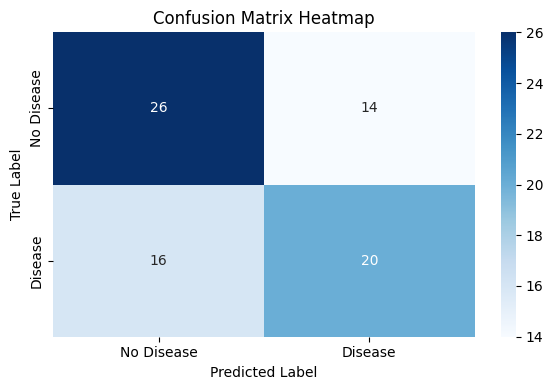

In [186]:
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

# Support Vector Machine

In [72]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {svm_linear.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {svm_linear.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.842
Accuracy of Train Dataset: 0.853


##### Vale Prediction for Test dataset for SVM

In [73]:
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1
 0 0]

Confusion Matrix: 
 [[37  3]
 [10 26]]

Accuracy : 82.895


# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
gini = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
gini.fit(X_train, y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {gini.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {gini.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.776
Accuracy of Train Dataset: 0.809


##### Vale Prediction for Test dataset for Decision Tree

In [75]:
y_predict=gini.predict(X_test) 
print("Predicted values:\n")
print(y_predict) 
cal_accuracy(y_test, y_predict)

Predicted values:

[1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1
 0 0]

Confusion Matrix: 
 [[31  9]
 [ 8 28]]

Accuracy : 77.632


# Random Forest

In [228]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {forest.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {forest.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.711
Accuracy of Train Dataset: 1.000


##### Over Fitting Issue
##### Vale Prediction for Test dataset for Rondom Forest

Predicted values:

[0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0
 1 0]

===== Random Forest =====

Confusion Matrix:
 [[30 10]
 [12 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        40
           1       0.71      0.67      0.69        36

    accuracy                           0.71        76
   macro avg       0.71      0.71      0.71        76
weighted avg       0.71      0.71      0.71        76


Accuracy: 71.053%


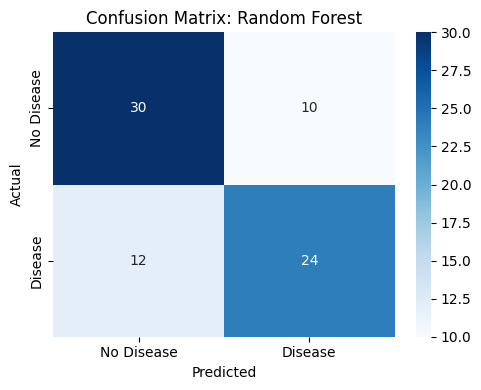

In [230]:
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict, 'Random Forest')

# Cross Validation For Models


===== Logistic Regression =====

Confusion Matrix:
 [[34  6]
 [10 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        40
           1       0.81      0.72      0.76        36

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76


Accuracy: 78.947%


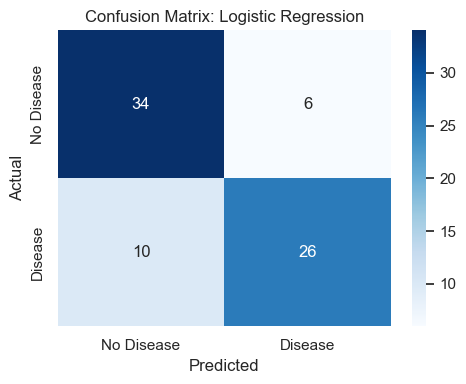

Cross-Validation Accuracies for each fold: [87.1  80.65 87.1  90.   86.67 83.33 86.67 83.33 73.33 80.  ]

Mean CV Accuracy: 83.82%
Standard Deviation: 4.59%


===== Support Vector Machine =====

Confusion Matrix:
 [[34  6]
 [13 23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78        40
           1       0.79      0.64      0.71        36

    accuracy                           0.75        76
   macro avg       0.76      0.74      0.74        76
weighted avg       0.76      0.75      0.75        76


Accuracy: 75.000%


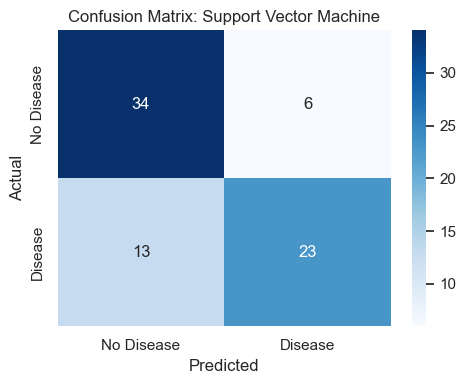

Cross-Validation Accuracies for each fold: [87.1  70.97 80.65 86.67 86.67 70.   83.33 80.   70.   80.  ]

Mean CV Accuracy: 79.54%
Standard Deviation: 6.56%


===== Decision Tree =====

Confusion Matrix:
 [[32  8]
 [19 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.80      0.70        40
           1       0.68      0.47      0.56        36

    accuracy                           0.64        76
   macro avg       0.65      0.64      0.63        76
weighted avg       0.65      0.64      0.63        76


Accuracy: 64.474%


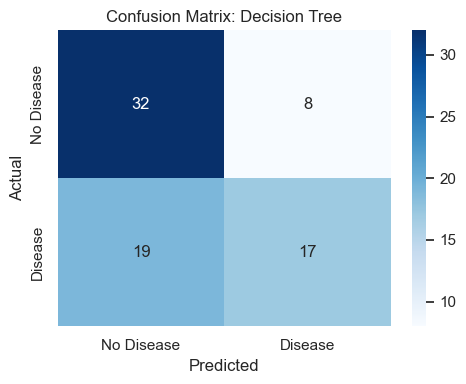

Cross-Validation Accuracies for each fold: [80.65 67.74 77.42 76.67 76.67 60.   76.67 80.   76.67 80.  ]

Mean CV Accuracy: 75.25%
Standard Deviation: 6.13%


===== Random Forest =====

Confusion Matrix:
 [[33  7]
 [13 23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        40
           1       0.77      0.64      0.70        36

    accuracy                           0.74        76
   macro avg       0.74      0.73      0.73        76
weighted avg       0.74      0.74      0.73        76


Accuracy: 73.684%


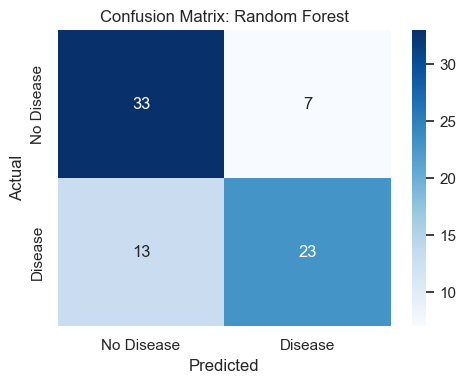

Cross-Validation Accuracies for each fold: [87.1  87.1  80.65 86.67 93.33 73.33 86.67 80.   73.33 86.67]

Mean CV Accuracy: 83.48%
Standard Deviation: 6.16%



array([0.87096774, 0.87096774, 0.80645161, 0.86666667, 0.93333333,
       0.73333333, 0.86666667, 0.8       , 0.73333333, 0.86666667])

In [248]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

warnings.simplefilter('ignore')
X_train, X_test, y_train, y_test = train_test_split(df_selected_X, df_selected_y, test_size=0.25, random_state=0)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

def cal_accuracy(y_true, y_pred, model_name):
    print(f"\n===== {model_name} =====")
    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print(f"\nAccuracy: {accuracy_score(y_true, y_pred) * 100:.3f}%")

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
def cross_validate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f"Cross-Validation Accuracies for each fold: {np.round(scores * 100, 2)}")
    print(f"\nMean CV Accuracy: {np.mean(scores) * 100:.2f}%")
    print(f"Standard Deviation: {np.std(scores) * 100:.2f}%\n")
    return scores
lr = LogisticRegression(max_iter=1000, solver='newton-cg')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
cal_accuracy(y_test, y_pred_lr, "Logistic Regression")
cross_validate_model(lr, df_selected_X, df_selected_y)

svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_svm = svm_linear.predict(X_test)
cal_accuracy(y_test, y_pred_svm, "Support Vector Machine")
cross_validate_model(svm_linear, df_selected_X, df_selected_y)

dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
cal_accuracy(y_test, y_pred_dt, "Decision Tree")
cross_validate_model(dt, df_selected_X, df_selected_y)

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
cal_accuracy(y_test, y_pred_rf, "Random Forest")
cross_validate_model(rf, df_selected_X, df_selected_y)

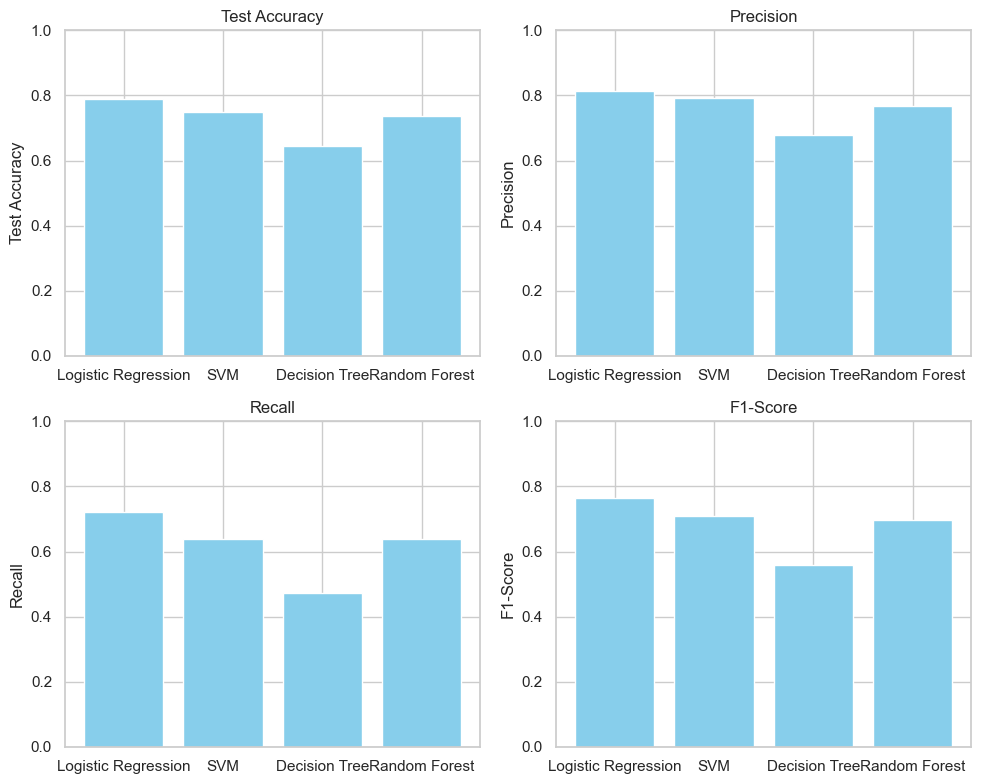

In [247]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = [lr.predict(X_test), svm_linear.predict(X_test), dt.predict(X_test), rf.predict(X_test)]
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
metrics = {
    'Test Accuracy': [lr.score(X_test, y_test), svm_linear.score(X_test, y_test), dt.score(X_test, y_test), rf.score(X_test, y_test)],
    'Precision': [precision_score(y_test, y) for y in y_pred],
    'Recall': [recall_score(y_test, y) for y in y_pred],
    'F1-Score': [f1_score(y_test, y) for y in y_pred]
}
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, (metric, values) in zip(axes.ravel(), metrics.items()):
    ax.bar(models, values, color='skyblue')
    ax.set_title(metric)
    ax.set_ylim(0, 1)
    ax.set_ylabel(metric)

plt.tight_layout()
plt.show()

### Best Model for Dataset is Linear Regression

In [8]:
X = df.drop("Target", axis=1)
y = df["Target"]
# and so on...


In [13]:
print(df.dtypes)


Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca             int64
Thal          object
Target         int64
dtype: object


In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [12]:
X = df_encoded.drop("Target", axis=1)
y = df_encoded["Target"]

from sklearn.linear_model import LogisticRegression
import joblib

final_model = LogisticRegression(max_iter=1000, solver='newton-cg')
final_model.fit(X, y)

joblib.dump(final_model, "heart_model.joblib")


['heart_model.joblib']

In [17]:
print(df_encoded.drop("Target", axis=1).columns.tolist())


['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical', 'Thal_normal', 'Thal_reversable']


In [2]:
import joblib
import numpy as np

model = joblib.load("heart_model.joblib")

def predict_heart_disease(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    
    prediction = model.predict(input_array)
    
    if prediction[0] == 1:
        return "💔 The person is likely to have heart disease."
    else:
        return "❤️ The person is not likely to have heart disease."


In [4]:
import pandas as pd

sample_input = [63, 1, 145, 233, 1, 0, 150, 0, 2.3, 2, 0,
                0, 0, 1, 1, 0]  
feature_names = ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak',
                 'Slope', 'Ca', 'ChestPain_nonanginal', 'ChestPain_nontypical',
                 'ChestPain_typical', 'Thal_normal', 'Thal_reversable']

sample_input_df = pd.DataFrame([sample_input], columns=feature_names)

prediction = model.predict(sample_input_df)

if prediction[0] == 1:
    print("💔 The person is likely to have heart disease.")
else:
    print("❤️ The person is not likely to have heart disease.")


❤️ The person is not likely to have heart disease.


In [19]:
import pandas as pd
import joblib

model = joblib.load("heart_model.joblib")

df = pd.read_csv("heart.csv")


In [37]:
os.environ["OMP_NUM_THREADS"] = "2"

In [39]:
model_features = model.feature_names_in_.tolist()


In [40]:
print("Model expects:", model.n_features_in_)
print("Current input shape:", X_encoded.shape)
print("Missing columns:", set(model_features) - set(X_encoded.columns))
print("Extra columns:", set(X_encoded.columns) - set(model_features))


Model expects: 16
Current input shape: (303, 18)
Missing columns: set()
Extra columns: {'Thal_fixed', 'ChestPain_asymptomatic'}


In [41]:
X_encoded = X_encoded[model_features]


In [43]:
print(np.array(shap_values).shape)


(1, 16, 2)


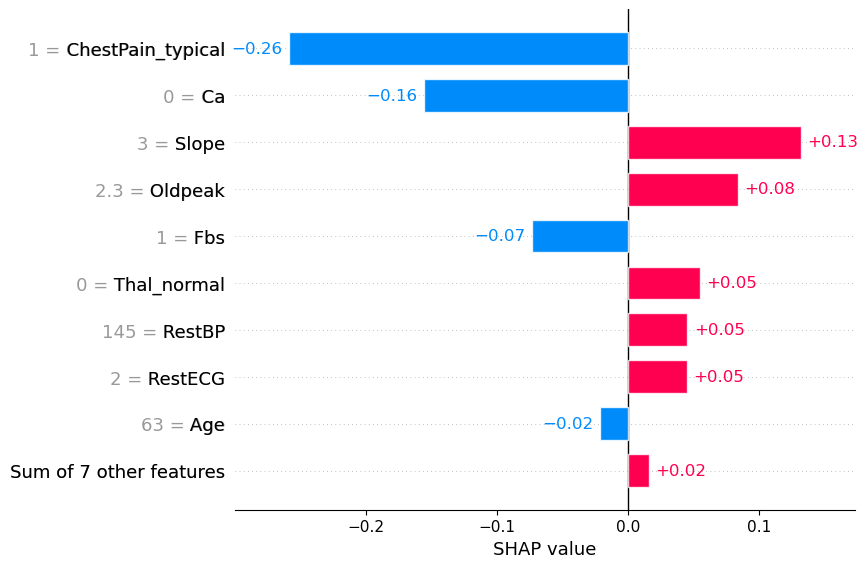

In [59]:
import shap

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[0, :, 1], sample)
shap.plots.bar(shap.Explanation(values=shap_values[0,:,1], 
                                base_values=explainer.expected_value[1],
                                data=sample.values[0],
                                feature_names=sample.columns.tolist()))


In [5]:
#SHAP Interpretation for Prediction
#This SHAP force plot shows the top features influencing the model’s prediction for a specific patient.
#- ChestPain_typical = 1 had the strongest negative impact (-0.26), suggesting it significantly reduced the predicted risk of heart disease.
#- Ca = 0 also reduced the risk with a SHAP value of -0.16, indicating no major vessels were colored by fluoroscopy.
#- On the other hand, Slope = 3 and Oldpeak = 2.3 increased the predicted risk with SHAP values of +0.13 and +0.08 respectively.
#- Overall, the model leaned slightly toward predicting lower risk of heart disease for this patient.